# Online Social Platform

### November 2018 - Update for large Data Sets

### Code related to the INFOCOM submission: "Performance Analysis of Online Social Platforms"

We analyse the influence of users in a generic online social platform. 

In such platform, there are $N$ users in total. Each user $n$ is considered as a virtual node and has a Newsfeed and a Wall. Suppose the Newsfeed of size $M$ and the Wall of size $K$. Furthermore, each user has a set of leaders, $L^{(n)}$, and he/she can be the leader of others. The Newsfeed of $n$ is refreshed instantaneously with posts published on the Walls of his Leaders. The user visits his Newsfeed and chooses among the currently available posts to re-post on his own Wall with rate $\mu^{(n)}\geq 0$ [posts/unit-time]. Additionally, he produces own posts on his Wall with rate $\lambda^{(n)}\geq 0$. These posts are marked on their production by the user-author index $(n)$.

**Assumptions:** The choice of which post to share on one's Wall and which post to evict when a new post arrives is uniformly random, among the present posts on the Wall and the Newsfeed. Also, both post-feed processes per user are assumed Poisson.

Consider a particular user $i$. The steady-state probability to find posts from user $i$ on the Newsfeed and Wall of user $n$ is the tuple $(p_i^{(n)},q_i^{(n)})$. With this, we form the steady state column-vectors

$Pvec(i):=(Pvec(1,i),\ldots,Pvec(N,i))=(p_i^{(1)},\ldots,p_i^{(n)})$, and

$Qvec(i):=(Qvec(1,i),\ldots,Qvec(N,i))=(q_i^{(1)},\ldots,q_i^{(n)})$.

These are the steady-state vectors for posts of origin $(i)$ on all the Newsfeeds and Walls of users. 

### Linear System solution

To find the values of the steady-state vectors $Pvec(i)$ and Qvec(i), one needs to solve the following linear system:

    (1) Pvec(i) = A.Pvec(i) + b(i)

    (2) Qvec(i) = C.Pvec(i) + d(i).

In the above $A$, $C$ are $N\times N$ matrices and $b(i)$, $d(i)$ are $N\times 1$ column vectors.

$A(j,k) = \frac{\mu^{(k)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(k\in L^{(j)})$,

$b(j,i) = \frac{\lambda^{(i)}}{\sum_{\ell\in L^{(j)}}\lambda^{(\ell)}+\mu^{(\ell)}}\mathbf{1}(i\in L^{(j)})$,

$C(j,i) = \frac{\mu^{(j)}}{\lambda^{(j)}+\mu^{(j)}}\mathbf{1}(j==i)$,

$d(j,i) = \frac{\lambda^{(i)}}{\lambda^{(i)}+\mu^{(i)}}\mathbf{1}(j==i)$.

## Implementation

In [1]:
%pylab inline
import math
import numpy as np
import networkx as nx
from IPython.core.debugger import Tracer

Populating the interactive namespace from numpy and matplotlib


## 1. Example Input Graph: Grid

In [2]:
#Grid size (number of nodes)
NS = 9

### Grid Graph

In the Grid graph, every node has 4 leaders, except the nodes on the 4 vertices of the Grid who have 2 leaders and the nodes on the edges who have 3.

The size of the grid graph should be such that $\sqrt{N}$ is a postive integer.

In [3]:
def grid_graph(N):
    #
    dim1 = math.sqrt(N)
    #
    # Check validity of Grid size
    if np.abs(dim1-int(dim1))>0:
        return print("not valid graph size N\n")
    #
    dim1 = int(dim1)
    #
    # If size is correct, then produce a list of Leaders.
    # Nodes are indexed from top-left ("0") to bottom-right ("N-1")
    # and in each row the indexing increased from left to right.
    #
    Lead = [list() for j in range(N)]
    #
    # Internal nodes with 4 leaders each.
    for n in range(1,dim1-1):
        for m in range(1,dim1-1):
            indx = dim1*n+m
            Lead[indx].extend([dim1*(n+1)+m, dim1*(n-1)+m, dim1*n+m+1, dim1*n+m-1 ])
    # Four vertices with 2 leaders each.
    Lead[0].extend([1, dim1])
    Lead[dim1-1].extend([dim1-2,dim1*2-1])
    Lead[dim1*(dim1-1)].extend([dim1*(dim1-1)+1,dim1*(dim1-2)])
    Lead[N-1].extend([N-2,dim1*(dim1-1)-1])
    # Remaining nodes on the four edges, not vertices.
    # Top
    for m in range(1,dim1-1):
        Lead[m].extend([m-1,m+1,dim1+m])
    # Bottom
    for m in range(1,dim1-1):
        Lead[dim1*(dim1-1)+m].extend([dim1*(dim1-1)+m-1,dim1*(dim1-1)+m+1,dim1*(dim1-2)+m])
    # Left
    for n in range(1,dim1-1):
        Lead[dim1*n].extend([dim1*n+1,dim1*(n-1),dim1*(n+1)])
    # Right
    for n in range(1,dim1-1):
        Lead[dim1*(n+1)-1].extend([dim1*(n+1)-2,dim1*(n)-1,dim1*(n+2)-1])

    return Lead

In [4]:
LeadGridS = grid_graph(NS)
print(LeadGridS)

[[1, 3], [0, 2, 4], [1, 5], [4, 0, 6], [7, 1, 5, 3], [4, 2, 8], [7, 3], [6, 8, 4], [7, 5]]


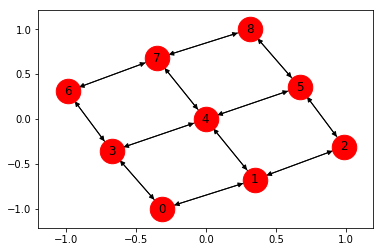

In [5]:
Ggrid=nx.DiGraph()
for n in range(NS):
    ln = list()
    ln = LeadGridS[n]
    for j in range(len(ln)):
        Ggrid.add_edge(ln[j],n)

pos=nx.spring_layout(Ggrid,iterations=100)
nx.draw_networkx(Ggrid,pos,arrows=True,with_labels=True,node_size=600,node_color='r')

Input parameters of the model (lambda and mu vectors) for different scenaria.

In [6]:
lam = 1.
mu = 1
Lvec2 = lam*np.ones(NS, np.float64)
Mvec2 = mu*np.ones(NS, np.float64)
lam1 = 10
mu1 = 0.5
Lvec3 = list(Lvec2)
Mvec3 = list(Mvec2)
Lvec3[0] = lam1
Mvec3[0] = mu1
Lvec3 = np.asarray(Lvec3)
Mvec3 = np.asarray(Mvec3)

Translation of the input to Dictionaries and Dictionaries-of-Dictionaries. We use here for the example the case "3" (Lvec3, Mvec3)

In [7]:
NS = 9
LeadGraphS = {}
FollowGraphS = {}
RtweetS = {}
RrtweetS = {}
UserlistS = {}
for j in range(NS):
    RtweetS[j] = Lvec3[j]
    RrtweetS[j] = Mvec3[j]
    LeadGraphS[j] = set(LeadGridS[j])
    UserlistS[j] = j
for j in LeadGraphS:
    for i in LeadGraphS[j]:
        if i not in FollowGraphS:
            FollowGraphS[i] = set()
        FollowGraphS[i].add(j)
#
print("UserlistS",UserlistS,'\n')
print("LeadGraphS", LeadGraphS,'\n')
print("FollowGraphS", FollowGraphS,'\n')
print("RtweetS", RtweetS,'\n')
print("RrtweetS", RrtweetS,'\n')

UserlistS {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8} 

LeadGraphS {0: {1, 3}, 1: {0, 2, 4}, 2: {1, 5}, 3: {0, 4, 6}, 4: {1, 3, 5, 7}, 5: {8, 2, 4}, 6: {3, 7}, 7: {8, 4, 6}, 8: {5, 7}} 

FollowGraphS {1: {0, 2, 4}, 3: {0, 4, 6}, 0: {1, 3}, 2: {1, 5}, 4: {1, 3, 5, 7}, 5: {8, 2, 4}, 6: {3, 7}, 7: {8, 4, 6}, 8: {5, 7}} 

RtweetS {0: 10.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0} 

RrtweetS {0: 0.5, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0} 



## 2. Emulator Input from Twitter Data Set

Extract Author List

In [8]:
directory = "/Users/Fishbone/Desktop/NEWSFEEDfresh/PYTHON/Emulator/"
f = open(directory+"tweets.parsed.sorted22n.txt")
Author = {}
for lign in f:
    lign = lign.split()
    tweetid = int(lign[0])
    userid = int(lign[2])
    Author[tweetid] = userid
f.close()

In [9]:
Ntweet = {}
Nrtweet = {}
LeadGraph = {}
FollowGraph = {}
FirstT = None
LastT = None
f = open(directory+"tweets.parsed.sorted22n.txt")
for lign in f:
    lign = lign.split()
    tstamp = int(lign[1])
    userid = int(lign[2])
    rtid = int(lign[3])
    if FirstT == None:
        FirstT = tstamp
    if userid not in Ntweet:
        Ntweet[userid] = 0
        Nrtweet[userid] = 0
        LeadGraph[userid] = set()      
    if rtid == -1:
        Ntweet[userid] += 1
    else: 
        if rtid in Author:
            LeadGraph[userid].add(Author[rtid])
            Nrtweet[userid] += 1
            if Author[rtid] not in FollowGraph:
                FollowGraph[Author[rtid]] = set()
            FollowGraph[Author[rtid]].add(userid)
        else:
            Ntweet[userid] += 1
LastT = tstamp
f.close()

From the input we derive the posting and re-posting estimated rates (Rtweet, Rrtweet)

In [10]:
Rtweet = {}
Rrtweet = {}
for user in Ntweet:
    Rtweet[user] = Ntweet[user]/(LastT-FirstT)
    Rrtweet[user] = Nrtweet[user]/(LastT-FirstT)

In [11]:
len([0 for u in Rtweet if Rtweet[u]==0])

3416701

In [11]:
len(FollowGraph)

405236

In [17]:
print(FollowGraph[2083])
print(LeadGraph[2083])
print(LeadGraph[3474])

{3474}
set()
{2083, 2660, 327, 16559, 408, 23742}


Map user to a dictionary for Reference:

In [12]:
Userlist = {}
k=0
for user in Rtweet:
    Userlist[k] = user
    k+=1

In [12]:
#print(Userlist[10010])

Size of the Data Sample is N

In [12]:
N = len(Userlist)
print(N)

6020228


Some test calculations

In [14]:
#print(LeadGraph[Userlist[10010]])

In [15]:
#for k in range(10):
#    print(Userlist[k])

In [16]:
#print(Rtweet[790])
#print(Rtweet[Userlist[1]])
#print(Userlist[1])

In [17]:
#print(Userlist[10010])
#print(LeadGraph[Userlist[10010]])
#print(Userlist[10010] in FollowGraph[1280])

In [18]:
#FollowGraph[205]

In [19]:
#FollowGraph[5234901]

## 3. Performance evaluation with Sparse Matrices

From the Linear System solution, one realises that it is necessary to first populate the matrices $A$ and $C$, which are relevant for any solution process of the system. 

**Note** We will keep in memory Dictionaries, with Key the userid and value the list of positive matrix entries.

### Build matrix A in sparse format

In [8]:
def som_sparse(Lvec,Mvec,Lead):
    Som = {} 
    for user in Lvec:
        Som[user] = 0
        for leader in Lead[user]:
            Som[user]+=Lvec[leader]+Mvec[leader]
    return Som

In [11]:
SomS = som_sparse(RtweetS,RrtweetS,LeadGraphS) #SomS are the sums for the grid test

In [9]:
def fill_A_sparse(Lvec,Mvec,Lead,Som):
    A = {}
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    for user in Lvec:
        A[user] = {}
        for leader in Lead[user]:
            A[user][leader] = Mvec[leader]/Som[user]
    return A

In [12]:
AS = fill_A_sparse(RtweetS,RrtweetS,LeadGraphS,SomS) #AS is the A matrix for the grid test

In [17]:
#for user in RtweetS:
#    print(user, AS[user])

In [10]:
def fill_A_trans_sparse(Lvec,Mvec,Lead,Som):
    A_trans = {}
    # A_trans is a dictionary. The keys are the columns of matrix form A. 
    # Each key shows the non-zero elements of A for this column.
    # We consider that Lead[j] contains the set of leaders of node j.
    #
    for user in Lvec:
        A_trans[user] = {}
    for user in Lvec:
        for leader in Lead[user]:
            A_trans[leader][user] = Mvec[leader]/Som[user]
    return A_trans

In [13]:
A_transS = fill_A_trans_sparse(RtweetS,RrtweetS,LeadGraphS,SomS) #A_transS is the A transpose for the grid test

In [20]:
#for user in RtweetS:
#    print(user, A_transS[user])

### Build matrix C in sparse format

In [14]:
def fill_C_sparse(Lvec,Mvec):
    C = {}
    for user in Lvec:
        C[user] = 0
        if Lvec[user]+Mvec[user]>0:
            C[user] = Mvec[user]/(Lvec[user]+Mvec[user])
    return C

In [15]:
CS = fill_C_sparse(RtweetS,RrtweetS)
#print(CS)

In [29]:
#for j in range(NS):
#    k = UserlistS[j]
#    print(k, CS[k])

### Build vectors b and d in sparse format

We continue by including the column vectors $b_i$ and $d_i$, for a specific label $i$.

In [16]:
def fill_bi_sparse_v2(useri,Lvec,Som,Follow):
    b = {}
    if useri not in Follow:
        b[useri] = 0
        return b
    for user in Follow[useri]:
        b[user] = Lvec[useri]/Som[user]
    return b

In [17]:
biS_v2 = fill_bi_sparse_v2(UserlistS[0],RtweetS,SomS,FollowGraphS) #biS_v2 is the bi entries of grid (v2 refers to the accelerated method)
#print(biS_v2)

In [18]:
def fill_di_sparse_v2(useri,Lvec,Mvec):
    d = Lvec[useri]/(Lvec[useri]+Mvec[useri])
    return d

In [19]:
diS_v2 = fill_di_sparse_v2(UserlistS[0],RtweetS,RrtweetS) #diS_v2 is the di entries of grid (v2 refers to the accelerated method)
#print(UserlistS[0], diS_v2)

## Solution

After defining all matrices $A$, $C$ and vectors $b_i$, $d_i$ per label $i$ we can write down the main routine to find the fixed point.

** The method is based on the fixed point convergence**

$p_i(t+1) = A.p_i(t) + b_i$, for $t\rightarrow\infty$.

This should converge to $p_i$. Once it is found, the Wall steady-state can be calculated

$q_i = C.p_i + d_i$.

We first solve the fixed point for a specific label $i$.

**Implementation Note:** We have decided to consider a sparse realisation. We choose for each user the initialisation p0 = bi, which is sparse and has a few positive entries. We identify in the matrix A, those lines who have at least one positive entry on the columns that coincide with the non-zero elements of bi. We further add as extra lines those that have positive entry in bi (due to addition) and have not been considered. In this way we reduce the number of lines and columns to be dealt with per iteration. The new vector p1 will probably have more positive entries than the previous one. 

Hence V2 improves on the speed due to extra sparsity on bi_sparse_v2, and on the column/line multiplication.

In [20]:
def pi_method_sparse_v2(N,useri,A,A_trans,Lvec,Lead,Follow,Som,it = 1000, eps = .001):
    # V2: This method resolves the fixed-point exploiting vector sparsity further.
    #
    bi = fill_bi_sparse_v2(useri,Lvec,Som,Follow)
    #
    # Initialisation (the result should be independent of initialisation vector)
    #
    p_new = bi
    p_old = {}
    #
    normdiff = 2*eps
    #
    t = 0
    while (t<it) & (normdiff>eps):
        normdiff = 0
        p_old = p_new.copy()
        p_new = {}
        # We search the lines of A which contain non-zero entries coinciding with the non-zero
        # entries of p_old.
        mlines = set()
        for key in p_old:
            for tutu in A_trans[key]:
                mlines.add(tutu)
            #mlines = mlines.union(set(A_trans[key].keys()))
        #print("p_old",p_old)
        for tutu in bi:
            mlines.add(tutu)
        #mlines = mlines.union(set(bi.keys()))
        #print("mlines",mlines)
        for user in mlines:
            p_new[user] = 0
            for leader in Lead[user]:
                if leader in p_old:
                    p_new[user] += A[user][leader]*p_old[leader]
            if user in bi.keys():
                p_new[user]+=bi[user]
            # Norm 1 criterion:
            #normdiff += abs(p_old[user]-p_new[user])
            # Norm INF criterion:
            if user in p_old.keys():
                if abs(p_old[user]-p_new[user])>normdiff:
                    normdiff = abs(p_old[user]-p_new[user])
            else:
                if abs(0-p_new[user])>normdiff:
                    normdiff = abs(0-p_new[user])
        t += 1
        #Tracer()()
        #print("p_new",p_new)
    #
    # print("t=",t,"\n")
    # print("diff_last=",normdiff,"\n")
    return p_new

In [21]:
pi_end_v2 = pi_method_sparse_v2(NS,UserlistS[0],AS,A_transS,RtweetS,LeadGraphS,FollowGraphS,SomS)
print(pi_end_v2)

{0: 0.3648922972466232, 1: 0.7299003490645413, 2: 0.2005544564062678, 3: 0.7299003490645413, 4: 0.2005544564062678, 5: 0.07288758806307466, 6: 0.2005544564062678, 7: 0.07288758806307466, 8: 0.03621661556591238}


In [23]:
#sum2 = 0
#for user in RtweetS:
#    sum2 += pi_end_v2[user]
#print(sum2)

The following function is the general iteration to derive the solution on the Walls, Newsfeeds and the metric of Influence \Psi, for all users i=1...N

In [24]:
def solution_sparse_v2(N,A,A_trans,C,Lvec,Mvec,Lead,Follow,Som,it = 1000, eps = .001):
    # The fixed point solution is slow because the fixed point needs to be 
    # calculated for each label i separately.
    #
    # Newsfeed & Wall
    pNews = {}
    qWall = {}
    # Influence metric
    Psi = {}
    l=0  #just a counter (could be used for parallelization)
    for user in Lvec:
        print(l)
        pNews[user] = pi_method_sparse_v2(N,user,A,A_trans,Lvec,Lead,Follow,Som)
        #
        di = fill_di_sparse_v2(user,Lvec,Mvec)
        qWall[user]={}
        Psi[user] =0
        for userj in pNews[user]:
            qWall[user][userj] = C[userj]*pNews[user][userj]
            if userj==user:
                qWall[user][userj]+=di
            Psi[user] += qWall[user][userj]
        if user not in pNews[user]:
            qWall[user][user] = di
            Psi[user] += qWall[user][user]
        Psi[user] = (Psi[user]-qWall[user][user])/(N-1)
        l+=1
        #if command can be used to break the routine at l==1000 or some other number.
        #if l == 3000:
        #    return (pNews,qWall,Psi)
    #
    return (pNews,qWall,Psi)

In [25]:
(pNewsS_v2,qWallS_v2,PsiS_v2) = solution_sparse_v2(NS,AS,A_transS,CS,RtweetS,RrtweetS,LeadGraphS,FollowGraphS,SomS)
print(PsiS_v2)

0
1
2
3
4
5
6
7
8
{0: 0.14021599118999678, 1: 0.03828884479121787, 2: 0.02386516541096459, 3: 0.03828884479121786, 4: 0.051726973298073284, 5: 0.05580636381842355, 6: 0.023865165410964603, 7: 0.05580636381842355, 8: 0.03567216021243494}


## Evaluation for big matrix from Twitter input dataset

The number of considered users in the dataset

In [27]:
print(N)

6020228


Calculation of the general input: dictionary Som and the three dictionaries A, A-trans, C for the matrices.

In [28]:
Som = som_sparse(Rtweet,Rrtweet,LeadGraph)
A = fill_A_sparse(Rtweet,Rrtweet,LeadGraph,Som)
A_trans = fill_A_trans_sparse(Rtweet,Rrtweet,LeadGraph,Som)
C = fill_C_sparse(Rtweet,Rrtweet)

In [37]:
pi_end_v2 = pi_method_sparse_v2(N,Userlist[1303],A,A_trans,Rtweet,LeadGraph,FollowGraph,Som,it=10,eps=0.001)

In [ ]:
print(len(pi_end_v2))
print(pi_end_v2)

**Individual influence calculation**

This routine just calculates the influence of a specific user on the Wall and Newsfeed of others as well as its Influence metric \Psi[user].

In [25]:
def user_influence_v2(user,N,A,A_trans,C,Lvec,Mvec,Lead,Follow,Som,it = 100, eps = .001):
    #
    pNews = pi_method_sparse_v2(N,user,A,A_trans,Lvec,Lead,Follow,Som,it,eps)
    #
    di = fill_di_sparse_v2(user,Lvec,Mvec)
    qWall={}
    PsiU =0
    for userj in pNews:
        qWall[userj] = C[userj]*pNews[userj]
        if userj==user:
            qWall[userj]+=di
        PsiU += qWall[userj]
    if user not in pNews:
        qWall[user] = di
        PsiU += qWall[user]
    PsiU = (PsiU-qWall[user])/(N-1)

    return (qWall,PsiU)

Importing time to calculate the time of each run.

In [38]:
import time

In [69]:
#startT = time.time()
#(Influ0_v2,PsiU_v2) = user_influence_v2(Userlist[12],N,A,A_trans,C,Rtweet,Rrtweet,LeadGraph,FollowGraph,Som, eps = .001)
#print(PsiU_v2)
#endT = time.time()
#print("Dt=",endT-startT)

In [70]:
#print(Influ0_v2[17700])
#print(Influ0_v2[158410])
#print(Influ0_v2[172286])
#print(Influ0_v2[444382])
#print(Influ0_v2[1876907])

In [71]:
#print("TotalT=",N*(endT-startT))

In [72]:
#f2=open("/Users/Fishbone/Desktop/NEWSFEEDfresh/PYTHON/Analysis/test.txt","w")
#print("TotalT=",N*(endT-startT))
#print("Influence q of '158410' on other:", Influ0_v2,"\n",file=f2)
#print("Influence \Psy of '158410' on network", PsiU_v2,file=f2)
#f2.close()

In [73]:
#print(FollowGraph[Userlist[0]])
#print(LeadGraph[Userlist[0]])

### Main command line for running the solution process (need parallelization)

In [39]:
startT_big = time.time()

In [37]:
print(Userlist[1303])

11336


In [38]:
print(LeadGraph[Userlist[1303]])

{41437, 11374}


In [39]:
print(len(FollowGraph[Userlist[1303]]))

12929


In [40]:
(pNews_v2,qWall_v2,Psi_v2) = solution_sparse_v2(N,A,A_trans,C,Rtweet,Rrtweet,LeadGraph,FollowGraph,Som)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212


In [41]:
endT_big = time.time()
elapsed_time = endT_big-startT_big
print(elapsed_time,'\n')

93.97673177719116 



In [ ]:
Psi_sort = -np.sort(-Psi_v2)

In [ ]:
sort_index = np.argsort(-Psi_v2)

In [ ]:
sort_user = {}
kk = 0
for ind in sort_index:
    sort_user[ind] = Psi_sort[kk]
    kk+=1

Print the results to output files.

In [ ]:
import gzip
f = open('Psi_Sorted_M_short','w')
for u in sort_user:
    f.write("%d %g\n"%(u, Psi_sort[u]))
f.close()

In [75]:
#fresQ=open("/Users/Fishbone/Desktop/NEWSFEEDfresh/PYTHON/Analysis/RESULTwall.txt","w")
#print(qWall_v2,"\n",file=fresQ)
#fresQ.close()
#
#fresN=open("/Users/Fishbone/Desktop/NEWSFEEDfresh/PYTHON/Analysis/RESULTnews.txt","w")
#print(pNews_v2,"\n",file=fresN)
#fresN.close()
#
#fresP=open("/Users/Fishbone/Desktop/NEWSFEEDfresh/PYTHON/Analysis/RESULTpsi.txt","w")
#print(Psi_v2,"\n",file=fresP)
#fresP.close()

NameError: name 'qWall_v2' is not defined

In [78]:
#startT_big = time.time()
#(pNews_v2,qWall_v2,Psi_v2) = solution_sparse_v2(N,A,A_trans,C,Rtweet,Rrtweet,LeadGraph,FollowGraph,Som)
#endT_big = time.time()

In [79]:
#endT_big-startT_big

In [80]:
#L = []
#for k in Psi_v2:
#    L.append((Psi_v2[k]))

In [81]:
#sortL = np.sort(L)
#print(sortL)
#argsortL = np.argsort(L)
#print(argsortL)

In [82]:
#Psi_v2[Userlist[723]]

In [83]:
#keysortL = []
#for key in argsortL:
#    keysortL.append(Userlist[key])
#print(keysortL)

In [84]:
#Psi_v2[5363]